## [작업1] 얼굴영역검출
- 구글검색; '하르캐스케이드'
- 하르 캐스케이드는 'Rapid Object Detection using a Boosted Cascade of Simple Features' 논문(2001년 발표)에서 제안한 객체 검출기\

In [3]:
import cv2
img=cv2.imread('face.png')
img.shape


(574, 722, 3)

In [14]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[218,  97, 279, 279]], dtype=int32)

In [15]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 키값확인
- 아래코드를 실행하고 'a'를 누르면 97이 화면에 출력됨

In [8]:
import cv2
import numpy as np
image = np.zeros((100, 100, 3), np.uint8)

cv2.imshow("keytest", image)
ret = cv2.waitKey(0)
print('pressed key is {0}'.format(ret))
cv2.waitKey(0)
cv2.destroyAllWindows()

pressed key is 97


## [작업2] 비디오검출
- fps: 1초를 구성하는 이미지의 갯수
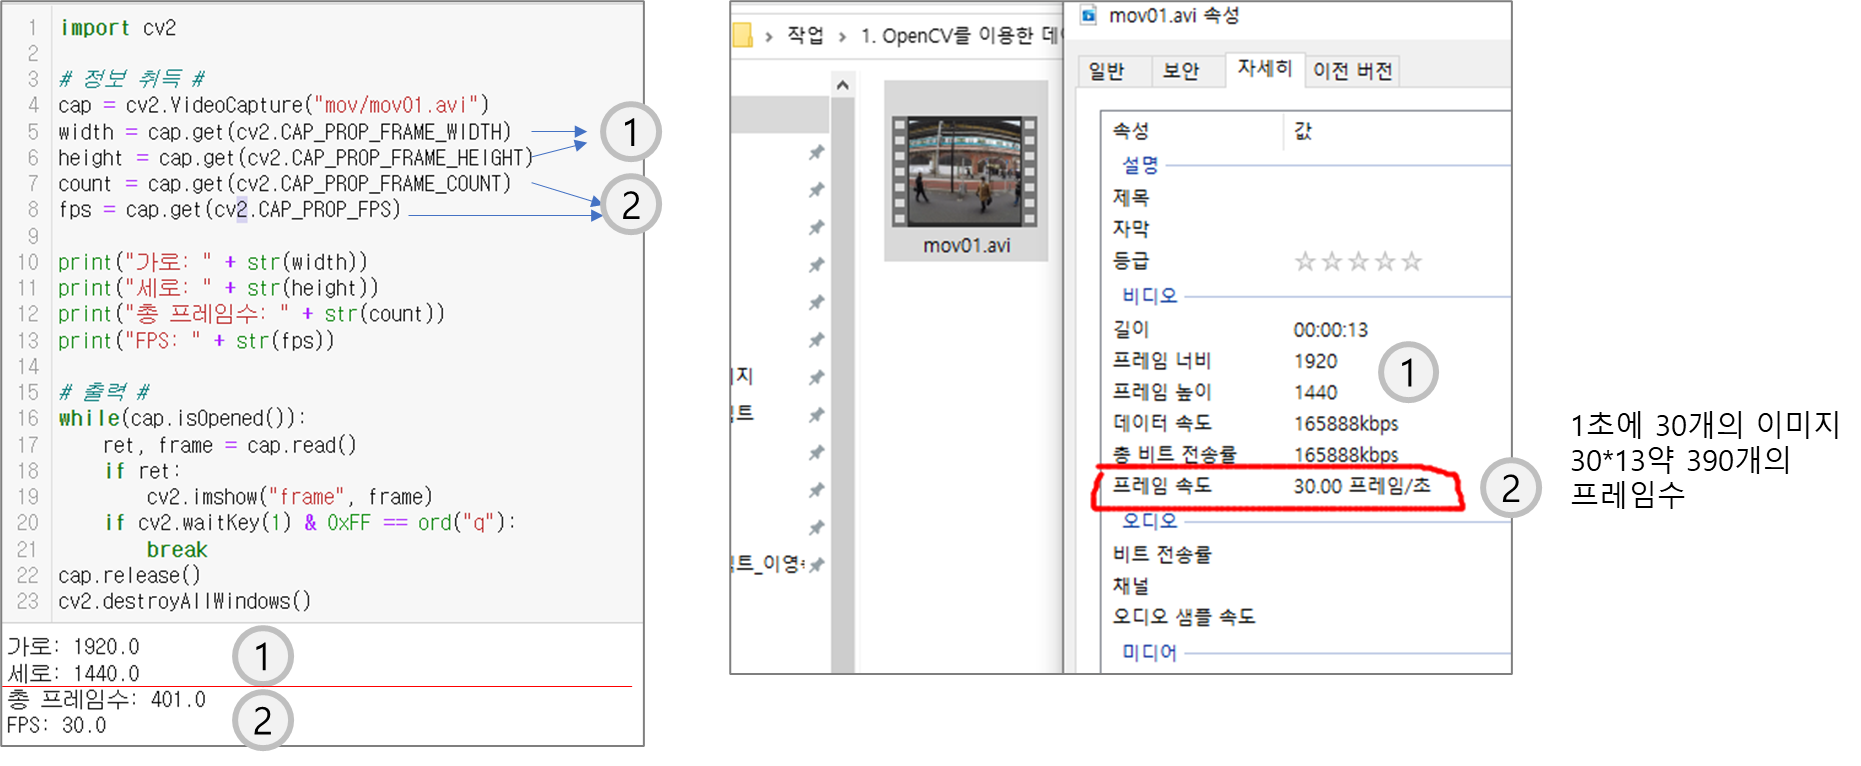

In [1]:
##################################
#### 비디오 플레이
##################################

import cv2
cap = cv2.VideoCapture("mov01.avi")  # 비디오 읽기(cv2.VideoCapture(0)d 으로하면 웹캠)

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cv2.imshow("frame", frame)
        
    if cv2.waitKey(10) == 27:                   # esc키를 누르면 중지
            break
    
cap.release()
cv2.destroyAllWindows()

In [3]:
###################################################################
#### 비디오 플레이 하면 화면 우측 끝에 숫자값 fps가 계속 변경됨
####################################################################
import cv2
cap = cv2.VideoCapture("mov01.avi")
org=(int(cap.get(3))-800,200)     # cap.get(3)은 비디오의 너비를 의미함.
print(org)
font=cv2.FONT_HERSHEY_SIMPLEX

num=0
while(cap.isOpened()):
    ret, frame = cap.read()
    num+=1; text='fps:'+ str(num) 
    
    if ret:
        frame = cv2.cvtColor(frame, cv2.IMREAD_COLOR)
        frame=cv2.resize(frame, (600,400))  ## resize
        cv2.putText(frame,text,(300,100),font,3,(255,255,255),7)
        cv2.imshow("frame", frame)
        
    #cv2.waitKey(int(1000/fps))        # 이작업도 동일함
    if cv2.waitKey(10) == 27:                   # esc키를 누르면 중지
            break
    
cap.release()
cv2.destroyAllWindows()

(1120, 200)


In [15]:
###################################################################
#### [미션] a키를 누르면 그 화면 이미지가 저장되게 합니다.
####  예) fps_37.jpg
####################################################################
import cv2
cap = cv2.VideoCapture("mov01.avi")
org=(int(cap.get(3))-800,200)     # cap.get(3)은 비디오의 너비를 의미함.
print(org)
font=cv2.FONT_HERSHEY_SIMPLEX

num=0
from datetime import datetime


while(cap.isOpened()):
    ret, frame = cap.read()
    num+=1; text='fps_'+ str(num) 
    
    
    if ret:
        frame = cv2.cvtColor(frame, cv2.IMREAD_COLOR)
        frame=cv2.resize(frame, (600,400))  ## resize
        
        if  cv2.waitKey(10) == 97:             
            cv2.imwrite(text+'.jpg',frame)
            print('이 영상의 {0} fps에 저장함'.format(text))
    cv2.imshow("frame", frame)
        
    #cv2.waitKey(int(1000/fps))        # 이작업도 동일함
    if cv2.waitKey(10) == 27:                   # esc키를 누르면 중지
            break
    
cap.release()
cv2.destroyAllWindows()

(1120, 200)
이 영상의 fps_18 fps에 저장함
이 영상의 fps_37 fps에 저장함
이 영상의 fps_55 fps에 저장함


## [미션1]: 비디오에서 사람객체에 박스 그리기
- 참고: 박스색상을 랜덤하게 그리고자 한다면
    - c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
- 작업: 실행2 코드를 이용하고 '1. 오픈CV를 이용한 사람영역검출.ipynb' 코드를 이용하여서 비디오에 사람영역을 검출합니다.
- 작업: 각 사람영역의 인원수만큼 cnt 우측에 출력함
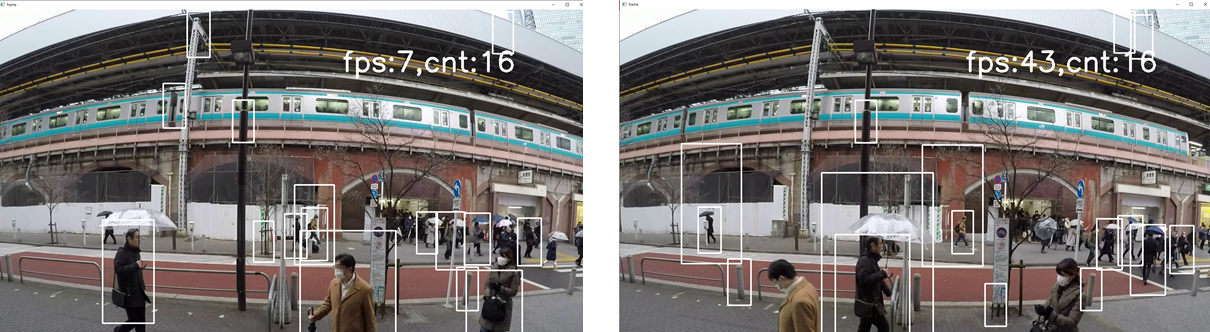

### ▶참고: 이동평균선을 이용한 노이즈 제거
- https://wikidocs.net/4373
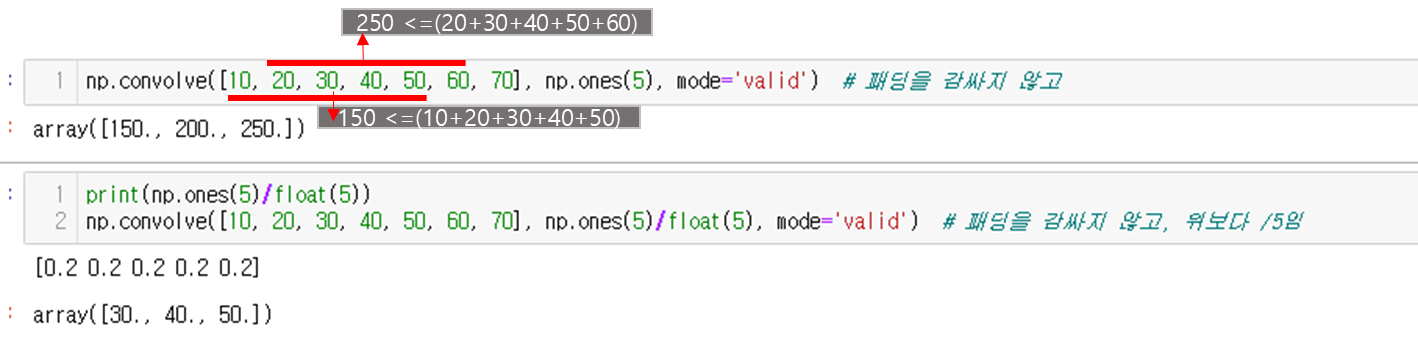

In [ ]:
## 이동평균선을 이용한 노이즈 제거
# https://wikidocs.net/4373

import numpy as np
def moving_average(x, y):
    y_conv = np.convolve(y, np.ones(5)/float(5), mode='valid')
    x_dat = np.linspace(np.min(x), np.max(x), np.size(y_conv))
    return x_dat, y_conv

plt.plot(x, y, label="raw")
ma_x, ma_y = moving_average(x, y)
plt.plot(ma_x,ma_y, label="average")
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,max(y)+2)
plt.legend()
plt.show()

In [ ]:
import pandas as pd
df=pd.DataFrame({'time':x,'2022-3-5':y})
df

In [ ]:
## 1초단위로 사람인원수를 그리고자함.
xSec,ySec=[],[]

for cnt,(x,y) in enumerate(data):
    
    if cnt%30==0:
        xSec.append(int(cnt/39))
        ySec.append(y)
        
plt.figure(figsize=(10,5))
plt.plot(xSec,ySec)

#print(cnt,int(cnt/30))
    